In [3]:
import pandas as pd

help(corr)

NameError: name 'corr' is not defined

In [61]:
#q1
import pandas as pd
import numpy as np
data=np.loadtxt("iqdata.csv")
data=np.sort(data)
df1=pd.read_csv('iqdata.csv',header=None)
df1=df.sort_values(0)
pop_mean=round(np.mean(data),2)
pop_stdev=round(np.std(data),2)

def prob_percentage():
    t1=[]
    t2=[]
    for i in df1[0]:
        if i>=lower:
            t1.append(i)
        if i<=upper:
            t2.append(i)
    prop_lower=len(t1)/len(df1)
    prop_upper=len(t2)/len(df1)
    teststats=abs(prop_upper-prop_lower)*100
    percent=round(teststats,3)
    return percent
    
import csv
from scipy import stats
with open("testcaseiq.txt", "r") as fd:
    f = fd.read().splitlines()
nfiles=f[0]
flist=f[1:]
flist=list(zip(*[iter(flist)]*3))
index=1
for i in flist:
    lower=int(i[0])
    upper=int(i[1])
    s1=pd.read_csv('{}.csv'.format(i[2]),header=None)
    test=stats.ttest_1samp(s1,0)
    pvalue=test[1]*100
    
    with open("output"+str(index)+".csv", "w") as out:
        writer = csv.writer(out, delimiter=",")
        writer.writerow([pop_mean])
        writer.writerow([pop_stdev])
        writer.writerow([prob_percentage()])
        if pvalue<0.005:
            writer.writerow([str('Reject')])
        else:
            writer.writerow([str('Accept')])
    index=index+1

In [ ]:
#q3
from sklearn import datasets
import numpy as np
import csv
import warnings
warnings.filterwarnings("ignore")
iris = datasets.load_iris()
x = iris.data
y = iris.target
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scores = cross_val_score(clf, iris.data, iris.target, cv=5,scoring="accuracy")
with open("/code/output/output.csv", "w") as out:
    writer = csv.writer(out, delimiter=",")
    writer.writerow([str(round(np.mean(scores),4))])

In [ ]:
#q4
import numpy as np
import pandas as pd
import csv
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_validate
df = pd.read_csv("/data/training/mtcars.csv")
x = df.loc[:, 'cyl':'carb']
y = df.loc[:, 'mpg']
rr = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
scores_lasso = cross_validate(rr, x, y, cv=10)
scores_ridge = cross_validate(lasso, x, y, cv=10)
with open("/code/output/output.csv", "w") as out:
    writer = csv.writer(out, delimiter=",")
    writer.writerow([str(round(np.mean(scores_ridge['test_score'])-np.mean(scores_lasso['test_score']),2))])

In [2]:
#q2
import pandas as pd
import numpy as np
import csv
df=pd.read_csv(r'C:\Users\hp\Desktop\edureka\assignments\assg4_q2\bottle.csv')
df=df[['T_degC','Salnty']]
df=df[0:1000]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df)
imputed_data = imputer.transform(df.values)
df=pd.DataFrame(imputed_data,columns=['T_degC','Salnty'])
x = df['Salnty'].values.reshape(-1,1)
y = df['T_degC'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
reg = lm.fit(X_train,y_train)
y_pred = reg.predict(X_test)

with open("output1.csv","w") as out:
    writer = csv.writer(out, delimiter=",")
    writer.writerow([str(X_train.shape[0])])
    writer.writerow([str(X_test.shape[0])])
    writer.writerow([np.round(reg.coef_,3).tolist()])
    writer.writerow([np.round(reg.intercept_,3).tolist()])

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold,cross_validate

kf = KFold(n_splits=5)
scores = cross_validate(lm, x, y, cv=kf, scoring='neg_mean_squared_error')
with open("output2.csv", "w") as out:
    writer = csv.writer(out, delimiter=',')
    writer.writerow([str(round(mean_squared_error(y_test,y_pred),3))])
    writer.writerow([str(round(r2_score(y_test,y_pred),3))])
    writer.writerow([str(round(np.mean(np.sqrt(np.abs(scores['test_score']))),3))])

In [1]:
#q2 from team mates
import pandas as pd
import numpy as np
import csv

df_all = pd.read_csv(r'C:\Users\hp\Desktop\edureka\assignments\assg4_q2\bottle.csv', nrows=1000)
df = df_all.loc[:,['Salnty','T_degC']]
df.fillna(df.mean(),inplace=True)
x = df['Salnty'].values.reshape(-1,1)
y = df['T_degC'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
reg = lm.fit(X_train,y_train)
y_pred = reg.predict(X_test)

with open("output1.csv", "w") as out:
    writer = csv.writer(out, delimiter=",")
    writer.writerow([str(X_train.shape[0])])
    writer.writerow([str(X_test.shape[0])])
    writer.writerow([np.round(reg.coef_,3).tolist()])
    writer.writerow([np.round(reg.intercept_,3).tolist()])

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold,cross_validate

kf = KFold(n_splits=5)
scores = cross_validate(lm, x, y, cv=kf, scoring='neg_mean_squared_error')
with open("output2.csv", "w") as out:
    writer = csv.writer(out, delimiter=',')
    writer.writerow([str(round(mean_squared_error(y_test,y_pred),3))])
    writer.writerow([str(round(r2_score(y_test,y_pred),3))])
    writer.writerow([str(round(np.mean(np.sqrt(np.abs(scores['test_score']))),3))])


In [84]:
df.shape

(1000, 2)

In [ ]:
[Century]-[YY][MM][ShipCode]-[CastType][Julian Day]-[CastTime]-[Line][Sta][Depth][Bottle]-[Rec_Ind]

In [85]:
df.isnull().any()

T_degC    False
Salnty    False
dtype: bool

In [86]:
df.describe()

,T_degC,Salnty
count,1000.000000,1000.000000
mean,8.983136,33.791437
std,4.160246,0.547293
min,1.930000,30.370000
25%,5.387500,33.460000
50%,8.375000,33.889000
75%,12.257500,34.264250
max,19.300000,34.600000


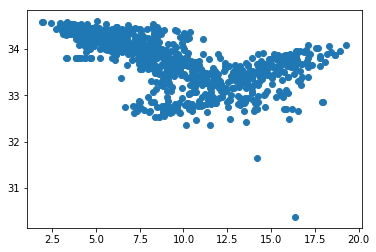

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['T_degC'],df['Salnty'])
#plt.show()

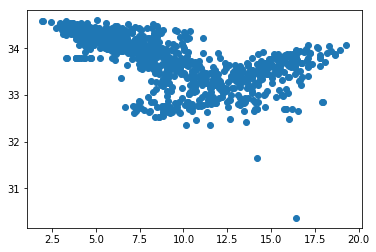

In [3]:
plt.plot(df['T_degC'],df['Salnty'],'o')

In [5]:
x=df['T_degC']
y=df['Salnty']
from sklearn.model_selection import train_test_split
import sklearn
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [6]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


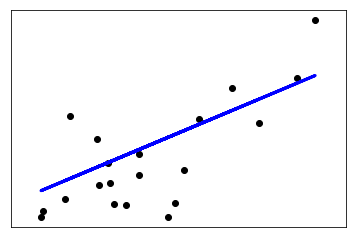

In [126]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import csv

"""
I.Load 1000 rows from the dataset from the file bottle.csv.
"""

df_all = pd.read_csv("/data/training/bottle.csv", nrows=1000)
df = df_all.loc[:,['Salnty','T_degC']]
df.fillna(df.mean(),inplace=True)
x = df['Salnty'].values.reshape(-1,1)
y = df['T_degC'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
reg = lm.fit(X_train,y_train)
y_pred = reg.predict(X_test)

with open("/code/output/output1.csv", "w") as out:
    writer = csv.writer(out, delimiter=",")
    writer.writerow([str(X_train.shape[0])])
    writer.writerow([str(X_test.shape[0])])
    writer.writerow([np.round(reg.coef_,3).tolist()])
    writer.writerow([np.round(reg.intercept_,3).tolist()])

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold,cross_validate

kf = KFold(n_splits=5)
scores = cross_validate(lm, x, y, cv=kf, scoring='neg_mean_squared_error')
with open("/code/output/output2.csv", "w") as out:
    writer = csv.writer(out, delimiter=',')
    writer.writerow([str(round(mean_squared_error(y_test,y_pred),3))])
    writer.writerow([str(round(r2_score(y_test,y_pred),3))])
    writer.writerow([str(round(np.mean(np.sqrt(np.abs(scores['test_score']))),3))])
